In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas
import numpy

# Input data

In [2]:
data = pandas.read_csv('hits_1000.csv', index_col=False)
data = data[data.event.values < 100]

data.head()

,event,particle,layer,iphi,x,y
0,0,0,5,39276,55.103343,-401.233874
1,0,6,5,22685,-381.682239,135.438799
2,0,3,3,6082,160.995866,139.460859
3,0,5,2,27787,-35.433651,-150.895515
4,0,5,1,15230,-19.627350,-82.702885


# Track Regression

Consider a track pattern recognition method using the Hough Tramsform in polar system. In this system a circular track can be parametrized as follow:

$$
r = 2r_{0}Cos(\phi - \theta)
$$

where:
* $r$ and $\phi$ : are coordinates of a hit in the polar system.
* $r_{0}$ and $\theta$ : are coordinates of a center of a circular track in the polar system.

A linear track corresponds to the $r_{0} = \infty$.

Transformation of cartesian coordinates of a hit to polar coordinates defined as:

$$
\phi = arctan(\frac{y}{x})
$$
$$
r = \sqrt{x^{2} + y^{2}}
$$


The Track Regression model fits the following model:

$$
r = 2r_{0} Cos(\theta) Cos (\phi) + 2r_{0} Sin(\theta) Sin(\phi)
$$

## Select one track

In [3]:
toy_event_id = 0
event = data[data.event.values == toy_event_id]
track = event[event.particle.values == numpy.unique(event.particle.values)[0]]
track

,event,particle,layer,iphi,x,y
0,0,0,5,39276,55.103343,-401.233874
9,0,0,4,52603,37.887823,-268.338430
14,0,0,8,96715,123.037152,-992.402065
26,0,0,2,30115,22.371445,-153.377047
34,0,0,7,73774,97.581043,-755.726101
38,0,0,6,54460,74.380074,-557.056195
41,0,0,0,7608,6.383496,-38.474030
42,0,0,3,41362,30.203952,-210.847626


## Track Regression Example

In [4]:
from regression import TrackRegression

tr = TrackRegression()
tr.fit(track.x.values, track.y.values)
x_pred, y_pred = tr.predict(numpy.linspace(-4, 4, 1000001))

print tr.theta_, tr.invr_

3.29886903946 8.53607787164e-05


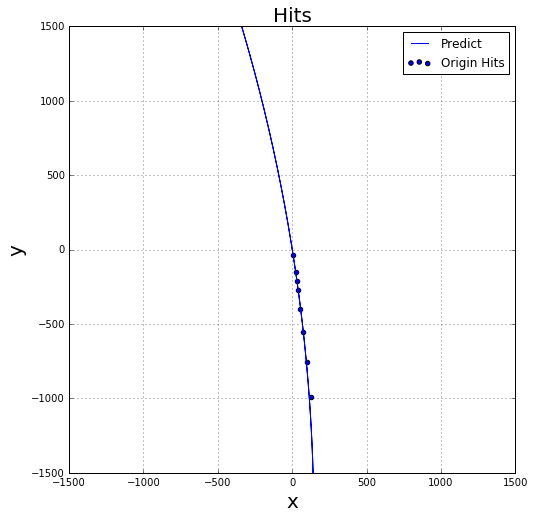

In [5]:
plt.figure(figsize=(8,8))

plt.scatter(track.x.values, track.y.values, label='Origin Hits')
plt.plot(x_pred, y_pred, label='Predict')

plt.title("Hits", size=20)
plt.xlim(-1500, 1500)
plt.ylim(-1500, 1500)
plt.grid(b=1)
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.legend(loc='best')
plt.show()